In [67]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist, fashion_mnist
import numpy as np

from matplotlib import pyplot as plt

In [68]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

In [69]:
# this is our input placeholder
input_img = Input(shape=(784,))

In [70]:
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# add layer
added_layer = Dense(32, activation='relu')(encoded)

In [71]:
# "decoded" is the lossy reconstruction of the input
decoded_layer = Dense(8 * encoding_dim, activation='relu')(added_layer)
decoded = Dense(784, activation='sigmoid')(decoded_layer)

In [72]:
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [73]:
# encoded and decoded
encoder = Model(input_img, encoded)
# encoded input place
encoded_input = Input(shape=(encoding_dim,))
deco = autoencoder.layers[-2](encoded_input)
deco = autoencoder.layers[-1](deco)
# create the decoder model
decoder = Model(encoded_input, deco)

In [74]:
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

In [75]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

history = autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/10
235/235 [==============================] - 3s 12ms/step - loss: 0.6932 - accuracy: 0.0011 - val_loss: 0.6931 - val_accuracy: 0.0010
Epoch 2/10
235/235 [==============================] - 2s 10ms/step - loss: 0.6931 - accuracy: 0.0011 - val_loss: 0.6930 - val_accuracy: 0.0011
Epoch 3/10
235/235 [==============================] - 2s 10ms/step - loss: 0.6929 - accuracy: 0.0012 - val_loss: 0.6929 - val_accuracy: 0.0011
Epoch 4/10
235/235 [==============================] - 2s 10ms/step - loss: 0.6928 - accuracy: 0.0012 - val_loss: 0.6928 - val_accuracy: 0.0011
Epoch 5/10
235/235 [==============================] - 2s 9ms/step - loss: 0.6927 - accuracy: 0.0012 - val_loss: 0.6927 - val_accuracy: 0.0011
Epoch 6/10
235/235 [==============================] - 2s 9ms/step - loss: 0.6926 - accuracy: 0.0012 - val_loss: 0.6925 - val_accuracy: 0.0011
Epoch 7/10
235/235 [==============================] - 2s 10ms/step - loss: 0.6925 - accuracy: 0.0012 - val_loss: 0.6924 - val_accuracy: 0.0012
E

In [79]:
# prediction on test data

pred = autoencoder.predict(x_test)
encod_img = encoder.predict(x_test)
decod_img = decoder.predict(encod_img)


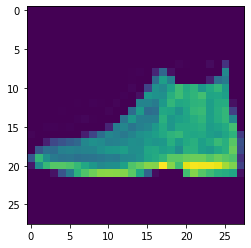

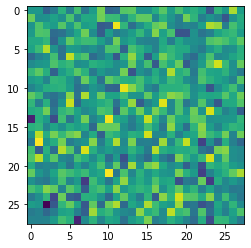

<function matplotlib.pyplot.show(*args, **kw)>

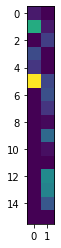

In [80]:
# visualization on test data and 
plt.imshow(x_test[0].reshape(28,28))
plt.show()

# visualize on the rconstruction
plt.imshow(pred[0].reshape(28, 28))
plt.show()

#Bonus question
# visualize in hidden layer(compressed image)
plt.imshow(encod_img[0].reshape(16,2))
plt.show

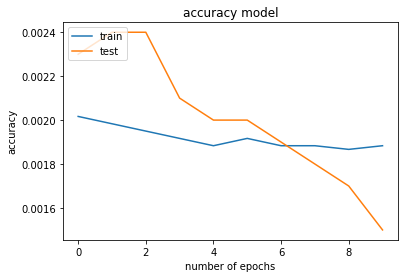

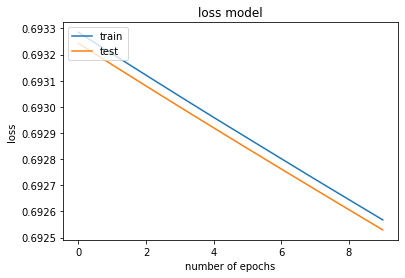

In [64]:
# plot the loss and accuracy
# history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy model')
plt.ylabel('accuracy')
plt.xlabel('number of epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss model')
plt.ylabel('loss')
plt.xlabel('number of epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()